IMPORTING REQUIRED LIBRARIES AND MAKING THE DATAFRAME

In [ ]:
import pandas as pd

# The data is read and stored in a dataframe
df = pd.read_csv("CollegeMsg.txt",delimiter = ' ',header = None)
df.columns = ['From','To','TimeStamp']

THE DATAFRAME df

In [ ]:
df

,From,To,TimeStamp
0,1,2,1082040961
1,3,4,1082155839
2,5,2,1082414391
3,6,7,1082439619
4,8,7,1082439756
...,...,...,...
59830,1899,1847,1098776648
59831,1899,1097,1098776836
59832,1899,277,1098777003
59833,1878,1624,1098777111


MAKING TRAINING AND TEST SETS

In [ ]:
# The dataframe is divided into train and test dataframes 
t1 = int(len(df)*0.8)
t2 = len(df)- t1

train = df[:][:t1]
test = df[:][t1:t2+t1]

USING ADAMIC ADAR TO TRAIN THE MODEL

In [ ]:
# The train dataset is converted to a networkx graph 
import networkx as nx
G = nx.Graph()
G = nx.from_pandas_edgelist(train, 'From', 'To')

# Adamic Adar Index is calculated for Graph G
preds = nx.adamic_adar_index(G)

In [ ]:
len(G.nodes())

1677

THE GRAPH OBTAINED

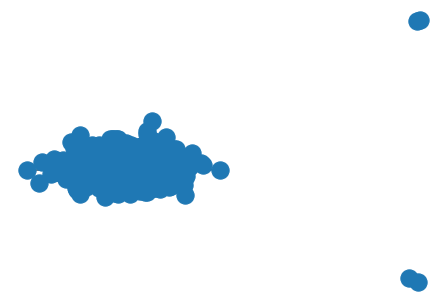

In [ ]:
nx.draw(G,label=True)

In [ ]:
# The preds list is sorted with the highest score at the top
preds = sorted(preds,reverse=True,key = lambda x: x[2])

# Top 10000 links are selected from the predicted links
preds = preds[:10000]

In [ ]:
preds

[(103, 400, 37.94579042280519),
 (9, 103, 25.636505818881894),
 (41, 400, 25.45529835641928),
 (9, 400, 25.00395450472655),
 (41, 103, 24.29110371612641),
 (103, 357, 21.187144522655696),
 (9, 41, 20.62948308008322),
 (103, 176, 18.930110268075758),
 (103, 321, 18.68496199414986),
 (67, 103, 17.708522598486105),
 (357, 400, 17.502995482787203),
 (638, 713, 17.161531313469396),
 (9, 1539, 16.87231717368978),
 (9, 67, 16.840382247949922),
 (103, 770, 16.615650553604034),
 (32, 103, 16.27894580480397),
 (372, 400, 16.1914647282631),
 (19, 400, 15.567357259582321),
 (19, 103, 15.472098979698647),
 (321, 400, 15.217958783057478),
 (103, 704, 14.974342203118637),
 (400, 770, 14.853481636677385),
 (103, 105, 14.721428075451689),
 (9, 357, 14.153297113344085),
 (103, 1283, 14.12621470679716),
 (9, 105, 14.123326422317762),
 (598, 638, 13.476109167196892),
 (357, 372, 13.142200854657435),
 (103, 871, 12.994767546215366),
 (713, 840, 12.505067381570855),
 (42, 103, 12.37045767791617),
 (9, 321, 

THE PREDICTED LINKS ARE STORED IN predictedLinks LIST

In [ ]:
# The links are extracted into a new list and the scores are left behind
predictedLinks = []
for i,j,k in preds:
  predictedLinks.append([i,j])

In [ ]:
# Links are extracted from train and test dataframes
l1, l2 = [],[]
x1, x2 = len(train), len(test)
for i in range(0,x1-1):
  l1.append([train['From'][i],train['To'][i]])

for i in range(x1,x1+x2):
  l2.append([test['From'][i],test['To'][i]])

In [ ]:
# The links are put into sets for computation purpose
trainSet = set(tuple(i) for i in l1)
testSet = set(tuple(i) for i in l2)
predictedLinksSet = set(tuple(i) for i in predictedLinks)

# Precison and Recall

In [ ]:
truePositive = predictedLinksSet.intersection(testSet)
falsePositive = predictedLinksSet.difference(truePositive)
falseNegative = testSet.difference(truePositive)

In [ ]:
tpLen = len(truePositive)
fpLen = len(falsePositive)
fnLen = len(falseNegative)

# Precision
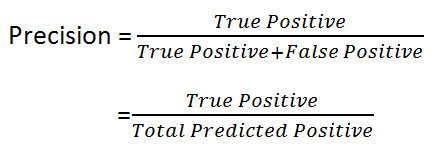

In [ ]:
precision = tpLen/(tpLen+fpLen)
print(precision)

0.0052


# Recall
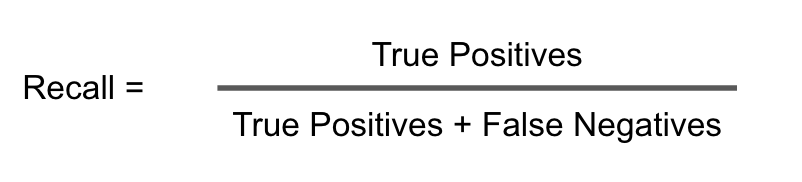

In [ ]:
recall = tpLen/(tpLen+fnLen)
print(recall)

0.011943040881947635


# AUC (Area Under Curve)
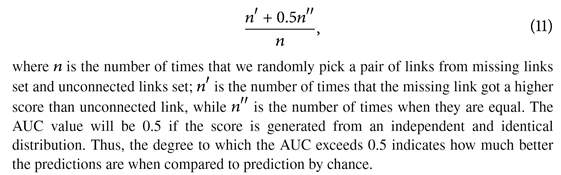

In [ ]:
import numpy as np
n,n1,n2 = 0., 0., 0.
for i in range(0,10000):
  n+=1
  t,f = np.random.randint(0,tpLen), np.random.randint(0,fpLen)
  if preds[t][2] > preds[f][2]:
    n1+=1
  if preds[t][2] == preds[f][2]:
    n2+=1

In [ ]:
(n1+0.5*n2)/n

0.9976